# **Sentimen Analisis Review Aplikasi Maxim di Play Store**


# Import Library

In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import nltk
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [2]:
  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ThinkPad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ThinkPad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Dataset

In [3]:
# Load dataset
app_reviews_df = pd.read_csv('dataset/ulasan_maxim.csv')
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bb879dc6-775d-4ea0-a16d-5a8cc2f7a917,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"lemot banget , map/gps jg sulit dipahami , keb...",2,7,3.16.2,2024-07-21 20:25:22,Kami mohon maaf atas ketidaknyamanan yang Anda...,2024-07-22 04:14:08,3.16.2
1,5b413c1a-54f6-40f6-a9a6-fa18ece12514,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,App Maxim kenapa jadi jelek banget ya!!! Mau o...,1,19,3.16.2,2024-07-20 10:27:29,Mohon maaf atas ketidaknyamanan ini. Kami seda...,2024-07-22 04:26:54,3.16.2
2,03bea7bc-1523-43f8-a893-d364b1edeed3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sengaja aku kasih bintang full biar puas kekur...,5,52,3.16.2,2024-07-21 04:18:47,Ulasan Anda membuat hari kami lebih baik! Teri...,2024-07-22 03:19:15,3.16.2
3,3ba62011-4cfd-4f62-8173-6f9eba474dd4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,map Maxim masih amburadul. kita harus tau titi...,3,53,3.16.2,2024-07-06 02:26:22,Kami mohon maaf dan akan segera melakukan perb...,2024-07-08 04:41:49,3.16.2
4,b8a020f4-ec1e-4ca9-b791-59a71d8219d3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,perlu ada pembaharuan pada peta dan titik poin...,3,35,3.16.2,2024-07-07 01:20:13,Mohon maaf atas ketidaknyamanan ini. Kami seda...,2024-07-08 04:39:39,3.16.2


In [4]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              300698 non-null  object
 1   userName              300698 non-null  object
 2   userImage             300698 non-null  object
 3   content               300698 non-null  object
 4   score                 300698 non-null  int64 
 5   thumbsUpCount         300698 non-null  int64 
 6   reviewCreatedVersion  272874 non-null  object
 7   at                    300698 non-null  object
 8   replyContent          150604 non-null  object
 9   repliedAt             150604 non-null  object
 10  appVersion            272874 non-null  object
dtypes: int64(2), object(9)
memory usage: 25.2+ MB


# Cleaning Data

In [5]:
clean_df = app_reviews_df[['content']]
clean_df.head()

,content
0,"lemot banget , map/gps jg sulit dipahami , keb..."
1,App Maxim kenapa jadi jelek banget ya!!! Mau o...
2,Sengaja aku kasih bintang full biar puas kekur...
3,map Maxim masih amburadul. kita harus tau titi...
4,perlu ada pembaharuan pada peta dan titik poin...


In [6]:
# menghapus baris yang memiliki nilai yang hilang (NaN) dari clean_df
clean_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  300698 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [7]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

# Menampilkan jumlah baris dan kolom
print(f"\nJumlah ulasan setelah menghapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")


Jumlah ulasan setelah menghapus duplikat: 146681


# Preprocessing

### 1. cleaningText(text)
Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

In [8]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

### 2. casefoldingText(text)
Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

In [9]:
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

### 3. tokenizingText(text)
Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

In [10]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

### 4. filteringText(text)
Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

In [11]:
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

### 5. stemmingText(text)
Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

In [12]:
def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

### 6. toSentence(list_words)
Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

In [13]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

### 7. fix_slangwords(text)
Fungsi ini digunakan untuk mengubah kata-kata slang bahasa Indonesia menjadi terjemahan atau artinya dalam bahasa formal.

In [14]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "apk": "aplikasi", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "sm": "sama", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "gk": "tidak", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [15]:
clean_df

,content
0,"lemot banget , map/gps jg sulit dipahami , keb..."
1,App Maxim kenapa jadi jelek banget ya!!! Mau o...
2,Sengaja aku kasih bintang full biar puas kekur...
3,map Maxim masih amburadul. kita harus tau titi...
4,perlu ada pembaharuan pada peta dan titik poin...
...,...
300689,🤪
300691,😭
300693,👎👎👎
300694,❌❌❌❌


In [16]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [17]:
clean_df

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"lemot banget , map/gps jg sulit dipahami , keb...",lemot banget mapgps jg sulit dipahami kebany...,lemot banget mapgps jg sulit dipahami kebany...,lambat banget mapgps juga sulit dipahami keban...,"[lambat, banget, mapgps, juga, sulit, dipahami...","[lambat, banget, mapgps, sulit, dipahami, keba...",lambat banget mapgps sulit dipahami kebanyakan...
1,App Maxim kenapa jadi jelek banget ya!!! Mau o...,App Maxim kenapa jadi jelek banget ya Mau orde...,app maxim kenapa jadi jelek banget ya mau orde...,app maxim kenapa jadi jelek banget iya mau ord...,"[app, maxim, kenapa, jadi, jelek, banget, iya,...","[app, maxim, jelek, banget, order, muat, ulang...",app maxim jelek banget order muat ulang uninst...
2,Sengaja aku kasih bintang full biar puas kekur...,Sengaja aku kasih bintang full biar puas kekur...,sengaja aku kasih bintang full biar puas kekur...,sengaja aku kasih bintang full biar puas kekur...,"[sengaja, aku, kasih, bintang, full, biar, pua...","[sengaja, kasih, bintang, full, biar, puas, ke...",sengaja kasih bintang full biar puas kekuranga...
3,map Maxim masih amburadul. kita harus tau titi...,map Maxim masih amburadul kita harus tau titik...,map maxim masih amburadul kita harus tau titik...,map maxim masih amburadul kita harus tahu titi...,"[map, maxim, masih, amburadul, kita, harus, ta...","[map, maxim, amburadul, titik, tepatnya, diinp...",map maxim amburadul titik tepatnya diinput nam...
4,perlu ada pembaharuan pada peta dan titik poin...,perlu ada pembaharuan pada peta dan titik poin...,perlu ada pembaharuan pada peta dan titik poin...,perlu ada pembaharuan pada peta dan titik poin...,"[perlu, ada, pembaharuan, pada, peta, dan, tit...","[pembaharuan, peta, titik, point, peta, sinkro...",pembaharuan peta titik point peta sinkron goog...
...,...,...,...,...,...,...,...
300689,🤪,,,,[],[],
300691,😭,,,,[],[],
300693,👎👎👎,,,,[],[],
300694,❌❌❌❌,,,,[],[],


## Pelabelan

In [20]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [21]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [22]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    78143
neutral     34747
negative    33791
Name: count, dtype: int64


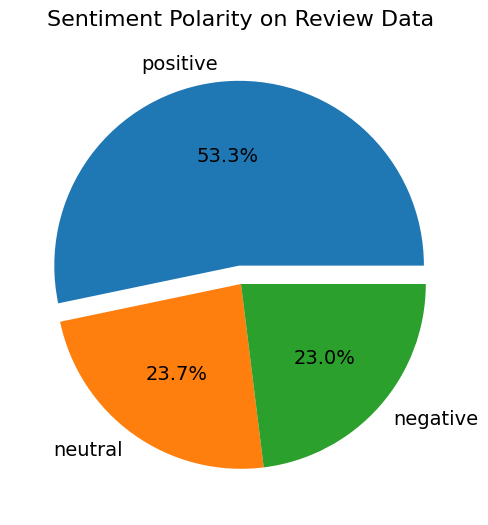

In [23]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [24]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 5000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [25]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 5000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [26]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 5000)

# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas netral.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'neutral_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_tweets = neutral_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

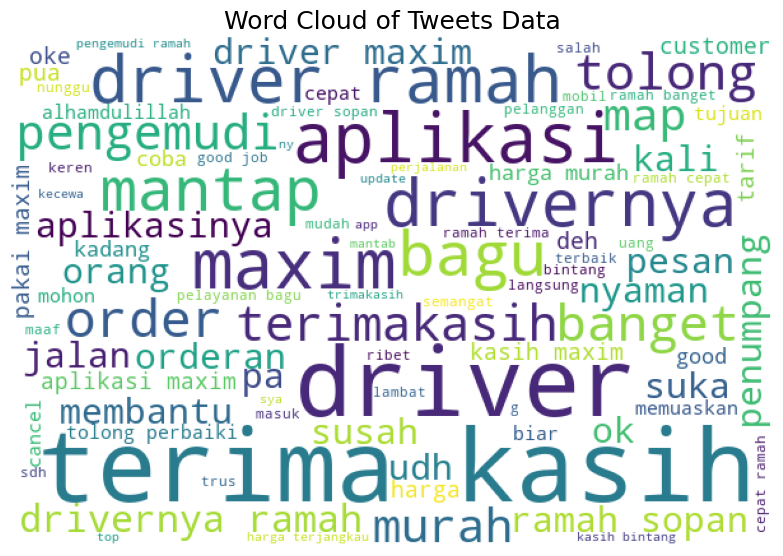

In [27]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

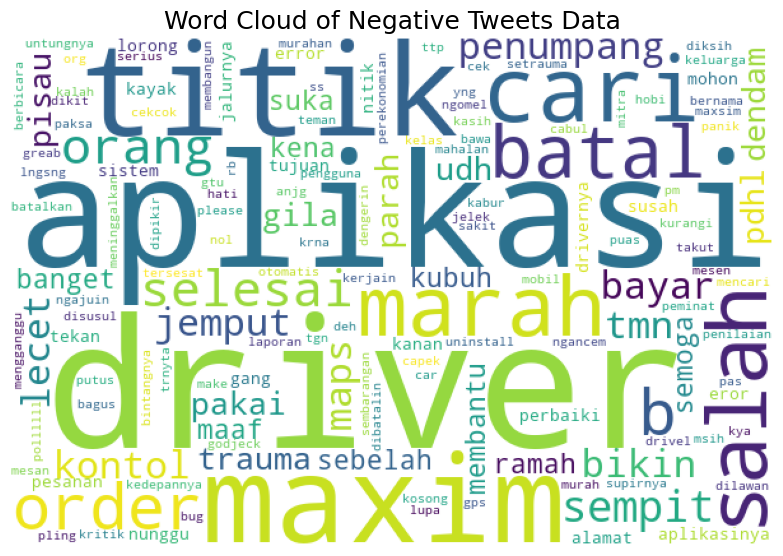

In [28]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

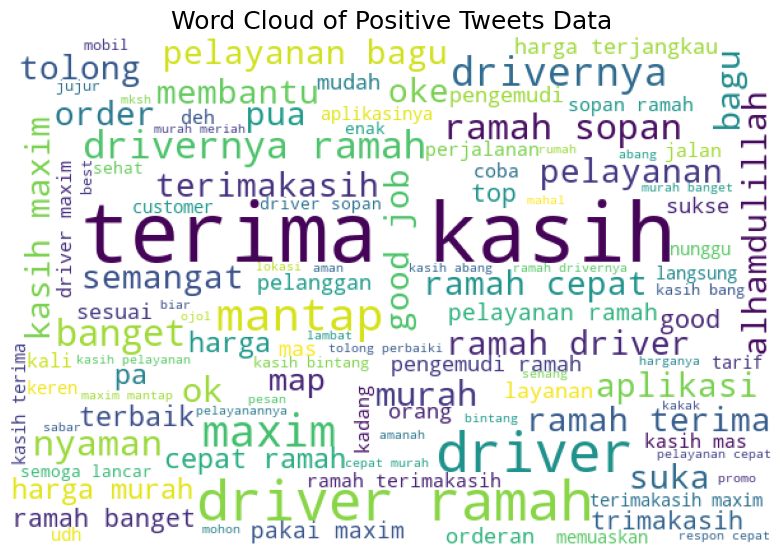

In [29]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

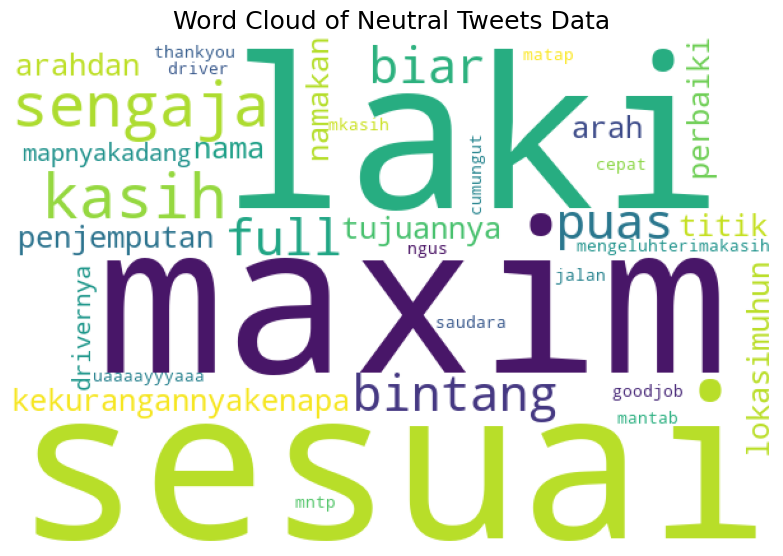

In [30]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

## **Data Splitting**

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [34]:
clean_df.head(4)

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,"lemot banget , map/gps jg sulit dipahami , kebanyakan menjelaskan/ menunjukan tentang warung , toko dan dan subjek² lainnya , bkn nama jalan/rute tertentu yg mudah dipahami seperti aplikasi sebelah yg mirip google maps",lemot banget mapgps jg sulit dipahami kebanyakan menjelaskan menunjukan tentang warung toko dan dan subjek² lainnya bkn nama jalanrute tertentu yg mudah dipahami seperti aplikasi sebelah yg mirip google maps,lemot banget mapgps jg sulit dipahami kebanyakan menjelaskan menunjukan tentang warung toko dan dan subjek² lainnya bkn nama jalanrute tertentu yg mudah dipahami seperti aplikasi sebelah yg mirip google maps,lambat banget mapgps juga sulit dipahami kebanyakan menjelaskan menunjukan tentang warung toko dan dan subjek² lainnya bukan nama jalanrute tertentu yang mudah dipahami seperti aplikasi sebelah yang mirip google maps,"[lambat, banget, mapgps, juga, sulit, dipahami, kebanyakan, menjelaskan, menunjukan, tentang, warung, toko, dan, dan, subjek², lainnya, bukan, nama, jalanrute, tertentu, yang, mudah, dipahami, seperti, aplikasi, sebelah, yang, mirip, google, maps]","[lambat, banget, mapgps, sulit, dipahami, kebanyakan, menunjukan, warung, toko, subjek², nama, jalanrute, mudah, dipahami, aplikasi, sebelah, google, maps]",lambat banget mapgps sulit dipahami kebanyakan menunjukan warung toko subjek² nama jalanrute mudah dipahami aplikasi sebelah google maps,-1,negative,18
1,"App Maxim kenapa jadi jelek banget ya!!! Mau order gak bisa"" muat ulang terus akhirnya di uninstal trs di install ulang malah gak bisa"" masuk kode verifikasi lewat SMS, jadul banget servernya!!! Verifikasi hrsnya lewat app wa malah SMS via TLP pun malah tiba"" mati tlpnya pas diangkat. Tolong dong nieh CS nya Maxim solusinya!!! Pusat bantuanpun gak ada di menu app ttp hrs login dulu!!",App Maxim kenapa jadi jelek banget ya Mau order gak bisa muat ulang terus akhirnya di uninstal trs di install ulang malah gak bisa masuk kode verifikasi lewat SMS jadul banget servernya Verifikasi hrsnya lewat app wa malah SMS via TLP pun malah tiba mati tlpnya pas diangkat Tolong dong nieh CS nya Maxim solusinya Pusat bantuanpun gak ada di menu app ttp hrs login dulu,app maxim kenapa jadi jelek banget ya mau order gak bisa muat ulang terus akhirnya di uninstal trs di install ulang malah gak bisa masuk kode verifikasi lewat sms jadul banget servernya verifikasi hrsnya lewat app wa malah sms via tlp pun malah tiba mati tlpnya pas diangkat tolong dong nieh cs nya maxim solusinya pusat bantuanpun gak ada di menu app ttp hrs login dulu,app maxim kenapa jadi jelek banget iya mau order gak bisa muat ulang terus akhirnya di uninstal terus di install ulang bahkan gak bisa masuk kode verifikasi lewat sms jaman dulu banget servernya verifikasi hrsnya lewat app wa bahkan sms via telepon pun bahkan tiba mati tlpnya pas diangkat tolong dong nieh cs nya maxim solusinya pusat bantuanpun gak ada di menu app ttp harus login dulu,"[app, maxim, kenapa, jadi, jelek, banget, iya, mau, order, gak, bisa, muat, ulang, terus, akhirnya, di, uninstal, terus, di, install, ulang, bahkan, gak, bisa, masuk, kode, verifikasi, lewat, sms, jaman, dulu, banget, servernya, verifikasi, hrsnya, lewat, app, wa, bahkan, sms, via, telepon, pun, bahkan, tiba, mati, tlpnya, pas, diangkat, tolong, dong, nieh, cs, nya, maxim, solusinya, pusat, bantuanpun, gak, ada, di, menu, app, ttp, harus, login, dulu]","[app, maxim, jelek, banget, order, muat, ulang, uninstal, install, ulang, masuk, kode, verifikasi, sms, jaman, banget, servernya, verifikasi, hrsnya, app, wa, sms, via, telepon, mati, tlpnya, pas, diangkat, tolong, nieh, cs, maxim, solusinya, pusat, bantuanpun, menu, app, ttp, login]",app maxim jelek banget order muat ulang uninstal install ulang masuk kode verifikasi sms jaman banget servernya verifikasi hrsnya app wa sms via telepon mati tlpnya pas diangkat

In [35]:
# mengambil fitur
y = clean_df['polarity']
# Mengonversi label string menjadi nilai numerik
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = y.map(label_mapping)

In [36]:
# tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_df['text_akhir'])

# konversi teks menjadi urutan ingeter
sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])

# Menentukan panjang maksimum urutan
max_sequence_length = max(len(seq) for seq in sequences)

# pad sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

Resample data untuk menyamakan jumlah dataset tiap polaritas dengan menggunakan metode undersampling

In [40]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto')
X_resampled, y_resampled = undersampler.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 33791, 1: 33791, 2: 33791})


In [41]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **Model Training**

## **1. Recurrent Neural Network (RNN)**

In [64]:
# import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

In [43]:
# Membangun model RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=64,
                    input_length=max_sequence_length))
model_rnn.add(SimpleRNN(32, return_sequences=True))
model_rnn.add(Dropout(0.5))
model_rnn.add(SimpleRNN(64))
# model.add(Dropout(0.5))
model_rnn.add(Dense(3, activation='softmax')) 

# Kompilasi model
model_rnn.compile(loss='sparse_categorical_crossentropy', 
              optimizer= 'adam', 
              metrics=['accuracy'])

# Latih model
history = model_rnn.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model_rnn.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss*100:.2f}%')

Epoch 1/10


c:\Users\ThinkPad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


634/634 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.7177 - loss: 0.6542 - val_accuracy: 0.9222 - val_loss: 0.2447
Epoch 2/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.9247 - loss: 0.2302 - val_accuracy: 0.9294 - val_loss: 0.2170
Epoch 3/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9574 - loss: 0.1293 - val_accuracy: 0.9284 - val_loss: 0.2132
Epoch 4/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9715 - loss: 0.0870 - val_accuracy: 0.9400 - val_loss: 0.1989
Epoch 5/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9811 - loss: 0.0581 - val_accuracy: 0.9409 - val_loss: 0.2176
Epoch 6/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 54s 85ms/step - accuracy: 0.9844 - loss: 0.0472 - val_accuracy: 0.9381 - val_loss: 0.2427
Epoch 7/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.9885 - loss: 0.0352 - val_accuracy: 0.9396 - val_loss: 0.2492
Epoch 8/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accurac

In [67]:
# Evaluasi model pada data latih dan data uji
rnn_train_loss, rnn_train_accuracy = model_rnn.evaluate(X_train, y_train, verbose=0)
rnn_test_loss, rnn_test_accuracy = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f'RNN Training Accuracy: {rnn_train_accuracy}')
print(f'RNN Test Accuracy: {rnn_test_accuracy}')

# Lakukan prediksi pada data uji dan evaluasi hasil prediksi
y_pred_rnn = model_rnn.predict(X_test, verbose=0)
pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

# Menampilkan laporan klasifikasi dan matriks kebingungan
print("Classification Report:")
print(classification_report(y_test, pred_classes_rnn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_classes_rnn))

RNN Training Accuracy: 0.9934647083282471
RNN Test Accuracy: 0.9343526363372803
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6715
           1       0.94      0.90      0.92      6889
           2       0.92      0.97      0.95      6671

    accuracy                           0.93     20275
   macro avg       0.93      0.93      0.93     20275
weighted avg       0.93      0.93      0.93     20275

Confusion Matrix:
[[6263  310  142]
 [ 290 6211  388]
 [  87  114 6470]]


## **2. Long Short-Term Memory (LSTM)**

In [48]:
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
# Membangun model LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64))
model_lstm.add(Bidirectional(LSTM(32)))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(3, activation='softmax')) # 3 kelas untuk sentimen negatif, netral, dan positif

# Kompilasi model dengan optimizer yang ditentukan
model_lstm.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Latih model
model_lstm.fit(X_train, y_train, epochs=10, 
          batch_size=64, 
          validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss*100:.2f}%')

Epoch 1/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 119s 88ms/step - accuracy: 0.7751 - loss: 0.5258 - val_accuracy: 0.9444 - val_loss: 0.1582
Epoch 2/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 154s 98ms/step - accuracy: 0.9623 - loss: 0.1098 - val_accuracy: 0.9512 - val_loss: 0.1414
Epoch 3/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 162s 128ms/step - accuracy: 0.9775 - loss: 0.0621 - val_accuracy: 0.9541 - val_loss: 0.1521
Epoch 4/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 139s 110ms/step - accuracy: 0.9850 - loss: 0.0430 - val_accuracy: 0.9563 - val_loss: 0.1545
Epoch 5/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 127s 97ms/step - accuracy: 0.9899 - loss: 0.0295 - val_accuracy: 0.9540 - val_loss: 0.1843
Epoch 6/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 136s 92ms/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 0.9544 - val_loss: 0.2090
Epoch 7/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 141s 92ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9511 - val_loss: 0.2195
Epoch 8/10
1268/1268 ━━━━━━━━━━━━━━━━━━━━ 136s 86ms/step - accuracy

In [68]:
# Evaluasi model pada data latih dan data uji
lstm_train_loss, lstm_train_accuracy = model_lstm.evaluate(X_train, y_train, verbose=0)
lstm_test_loss, lstm_test_accuracy = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f'LSTM Training Accuracy: {lstm_train_accuracy}')
print(f'LSTM Test Accuracy: {lstm_test_accuracy}')

# Lakukan prediksi pada data uji dan evaluasi hasil prediksi
y_pred_lstm = model_lstm.predict(X_test, verbose=0)
pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)

# Menampilkan laporan klasifikasi dan matriks kebingungan
print("Classification Report:")
print(classification_report(y_test, pred_classes_lstm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_classes_lstm))

LSTM Training Accuracy: 0.9948210716247559
LSTM Test Accuracy: 0.9425400495529175
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6715
           1       0.88      0.96      0.92      6889
           2       0.99      0.93      0.96      6671

    accuracy                           0.94     20275
   macro avg       0.95      0.94      0.94     20275
weighted avg       0.95      0.94      0.94     20275

Confusion Matrix:
[[6290  408   17]
 [ 195 6641   53]
 [  37  455 6179]]


## **Gated Recurrent Unit (GRU)**

In [50]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import Callback

In [53]:
# Buat model GRU dengan Dropout
model_gru = Sequential()
model_gru.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(GRU(64))
model_gru.add(Dense(3, activation='softmax'))  # 3 kelas untuk sentimen negatif, netral, dan positif

# Kompilasi model
model_gru.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# Latih model
history = model_gru.fit(X_train, y_train, 
                        epochs=5, 
                        batch_size=128, 
                        validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss*100:.2f}%')

Epoch 1/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 235s 360ms/step - accuracy: 0.8187 - loss: 0.4483 - val_accuracy: 0.9506 - val_loss: 0.1438
Epoch 2/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 238s 375ms/step - accuracy: 0.9688 - loss: 0.0864 - val_accuracy: 0.9552 - val_loss: 0.1398
Epoch 3/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 267s 383ms/step - accuracy: 0.9802 - loss: 0.0544 - val_accuracy: 0.9539 - val_loss: 0.1567
Epoch 4/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 269s 393ms/step - accuracy: 0.9865 - loss: 0.0360 - val_accuracy: 0.9351 - val_loss: 0.2150
Epoch 5/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 228s 339ms/step - accuracy: 0.9898 - loss: 0.0288 - val_accuracy: 0.9554 - val_loss: 0.1733
634/634 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9553 - loss: 0.1826
Accuracy: 95.54%
Loss: 17.33%


In [69]:
# Evaluasi model pada data latih dan data uji
gru_train_loss, gru_train_accuracy = model_gru.evaluate(X_train, y_train, verbose=0)
gru_test_loss, gru_test_accuracy = model_gru.evaluate(X_test, y_test, verbose=0)
print(f'GRU Training Accuracy: {gru_train_accuracy}')
print(f'GRU Test Accuracy: {gru_test_accuracy}')

# Lakukan prediksi pada data uji dan evaluasi hasil prediksi
y_pred_gru = model_gru.predict(X_test, verbose=0)
pred_classes_gru = np.argmax(y_pred_gru, axis=1)

# Menampilkan laporan klasifikasi dan matriks kebingungan
print("Classification Report:")
print(classification_report(y_test, pred_classes_gru))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_classes_gru))


GRU Training Accuracy: 0.9946114420890808
GRU Test Accuracy: 0.9553637504577637
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6715
           1       0.93      0.95      0.94      6889
           2       0.98      0.96      0.97      6671

    accuracy                           0.96     20275
   macro avg       0.96      0.96      0.96     20275
weighted avg       0.96      0.96      0.96     20275

Confusion Matrix:
[[6412  248   55]
 [ 216 6568  105]
 [  53  228 6390]]


In [70]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['RNN', 'LSTM', 'GRU'],
    'Accuracy Train': [rnn_train_accuracy, lstm_train_accuracy, gru_train_accuracy],
    'Accuracy Test': [rnn_test_accuracy, lstm_test_accuracy, gru_test_accuracy]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]

# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

  Model  Accuracy Test
2   GRU       0.955364
1  LSTM       0.942540
0   RNN       0.934353


## Prediksi kalimat baru

Dalam kasus Sentiment Analysis ini, algoritma Gated Recurrent Unit (GRU) mencapai akurasi tertinggi sebesar 95,54%. Oleh karena itu, algoritma Gated Recurrent Unit (GRU) dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [90]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Tokenisasi kalimat baru menggunakan tokenizer yang sama
sequences_kalimat_baru = tokenizer.texts_to_sequences([kalimat_baru_final])

# Padding urutan token agar memiliki panjang yang sama dengan input model
X_kalimat_baru = pad_sequences(sequences_kalimat_baru, maxlen=max_sequence_length)

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = model_gru.predict(X_kalimat_baru)
prediksi_label = np.argmax(prediksi_sentimen, axis=1)

# Menampilkan hasil prediksi
sentimen_labels = ['negative', 'neutral', 'positive']
print(f"Kalimat Baru : {kalimat_baru}")
print(f"Sentimen     : {sentimen_labels[prediksi_label[0]].upper()}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Kalimat Baru : kesan pertama bgus, harga terjangkau dan drivernya ramah
Sentimen     : POSITIVE.
